In [1]:
# Author : Shreyas Shashikant Vaishnav
# Purpose : Forecasting
# Dataset : Airlines_DB

In [2]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf 

In [32]:
# loading the airlines data

airlines = pd.read_csv(r"D:\Resume\Data Science\Assignments_SV\Data Science Assignment\Forecasting\passengerair.csv")

In [33]:
airlines.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [34]:
# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="Month", y="Passengers", data=airlines, height=7, aspect=1.6, robust=True, 
palette='tab10', scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.show()

KeyError: "['Passengers'] not in index"

Shape of your Data Set loaded: (96, 2)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    2 Predictors classified...
        1 variables removed since they were ID or low-information variables
No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz = 0 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


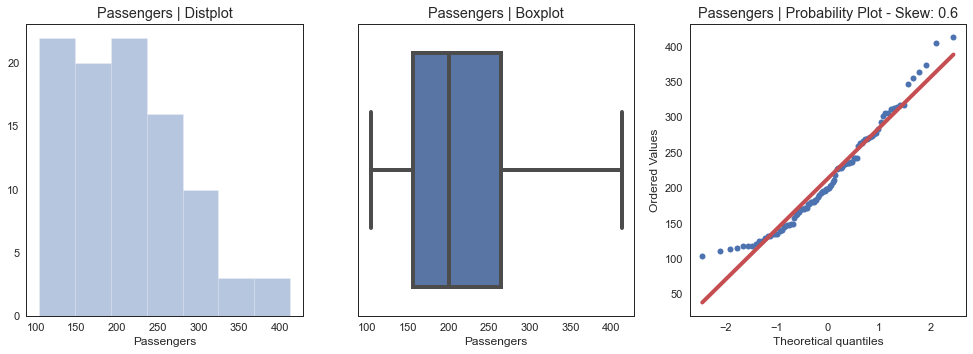

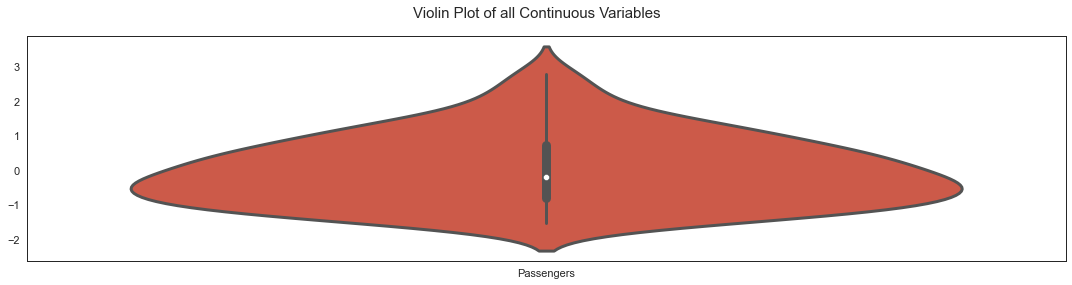

In [35]:
# AutoViz 

from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz(r"D:\Resume\Data Science\Assignments_SV\Data Science Assignment\Forecasting\dataairline.csv")

In [36]:
# Here The # at the begaining of the Passenger column could create the PatsyError later so remaining the column name

airlines = pd.DataFrame.rename(airlines, columns={'#Passengers':'Passengers'})

In [37]:
airlines.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [38]:
# 2 columns and the 144 rows of the data
airlines.shape

(144, 2)

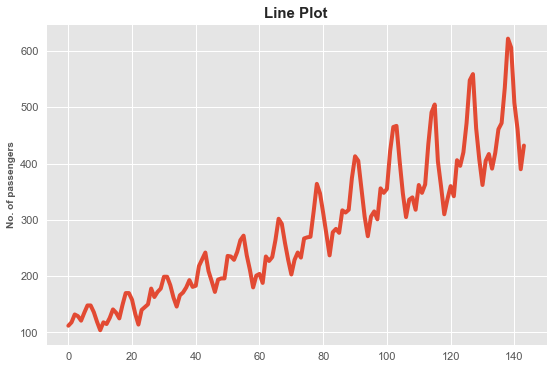

In [39]:
# Visualizing the overall data in order to the components present in our data

plt.style.use('ggplot')
plt.title("Line Plot", size = 15, weight = 'bold')
plt.ylabel("No. of passengers", size = 10, weight = 'bold')
plt.plot(airlines['Passengers'])
plt.show()

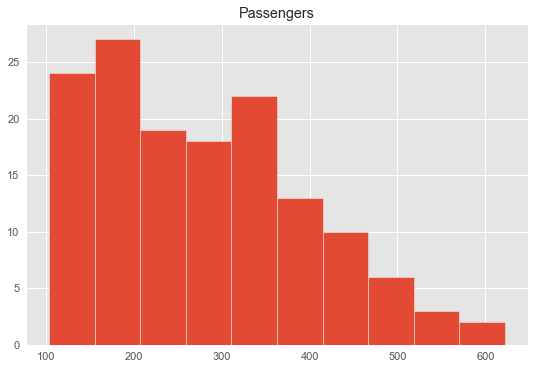

In [40]:
# checking the normality and the skewness of the data using hist plot 

airlines.hist()
plt.show()

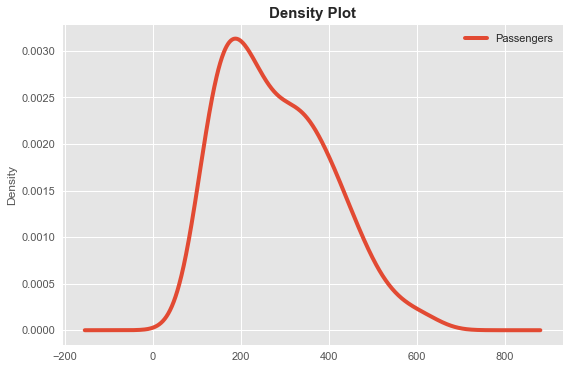

In [41]:
# kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) 
# of a random variable.

airlines.plot(kind = 'kde')
plt.title("Density Plot",size = 15, weight = 'bold')
plt.show()

In [42]:
airlines['Month'].head()

0    1949-01
1    1949-02
2    1949-03
3    1949-04
4    1949-05
Name: Month, dtype: object

In [43]:
airlines["Date"] = pd.to_datetime(airlines.Month,format="%Y-%m")

# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

airlines["month"] = airlines.Date.dt.strftime("%b") # month extraction
airlines["year"] = airlines.Date.dt.strftime("%Y") # year extraction

#airlines["Day"] = airlines.Date.dt.strftime("%d") # Day extraction
#airlines["wkday"] = airlines.Date.dt.strftime("%A") # weekday extraction

In [44]:
# Passing the month name in the %b format in list form

month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [45]:
# creating the dummies of the month column 

month_dummies = pd.DataFrame(pd.get_dummies(airlines['month']))

In [46]:
month_dummies.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


In [47]:
# concatening the data and the dummies of data
data = pd.concat([airlines,month_dummies], axis = 1)

In [48]:
data.head()

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1949-01,112,1949-01-01,Jan,1949,0,0,0,0,1,0,0,0,0,0,0,0
1,1949-02,118,1949-02-01,Feb,1949,0,0,0,1,0,0,0,0,0,0,0,0
2,1949-03,132,1949-03-01,Mar,1949,0,0,0,0,0,0,0,1,0,0,0,0
3,1949-04,129,1949-04-01,Apr,1949,1,0,0,0,0,0,0,0,0,0,0,0
4,1949-05,121,1949-05-01,May,1949,0,0,0,0,0,0,0,0,1,0,0,0


In [49]:
data["t"] = np.arange(1,145)
data["t_squared"] = data["t"]*data["t"]
data.columns
data["log_Passengers"] = np.log(data["Passengers"])

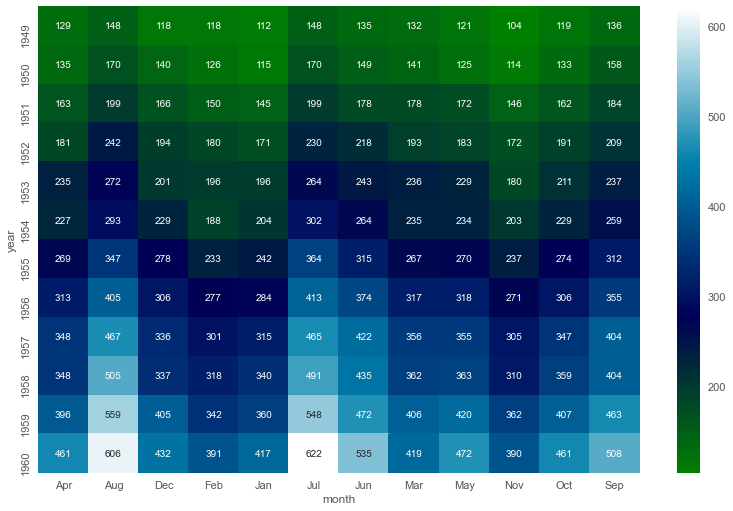

In [52]:
# PLotting the heatmap

plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=data,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month, annot=True, fmt="g", cmap= "ocean") #fmt is format of the grid values
plt.show()

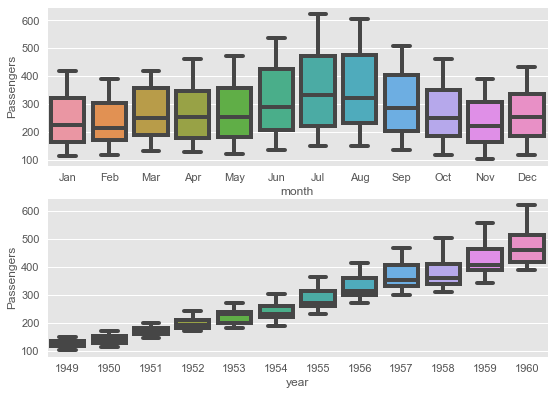

In [53]:
# plotting the Boxplot 
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=data)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=data)
plt.show()

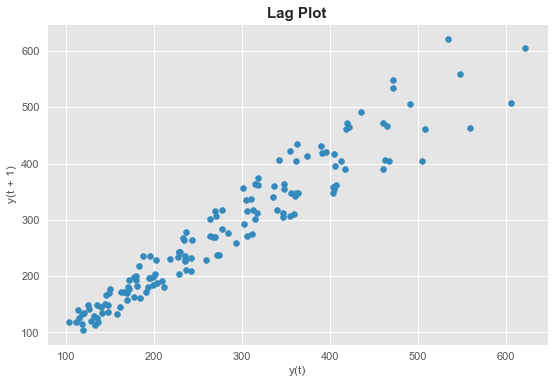

In [54]:
# lag plot to know the relationship

lag_plot(data['Passengers'])
plt.title("Lag Plot", size = 15, weight = "bold")
plt.show()

__We can see that there is a strong linear relationship between the output and its lagged version, by default value of k will be 1__

<Figure size 1080x576 with 0 Axes>

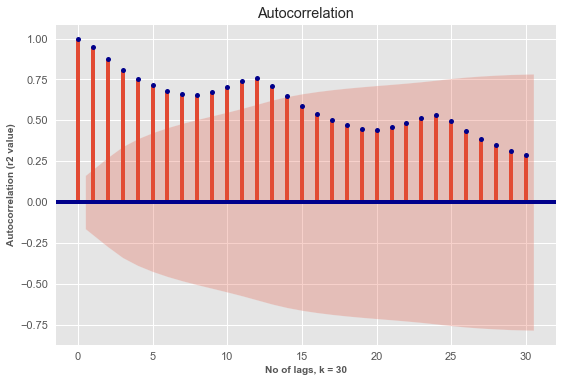

In [55]:
# ACF plot
# lags = 30 means it will plot for k = 30 lags 

plt.figure(figsize = (15,8))
plot_acf(data['Passengers'], lags = 30, color = 'darkblue')                                      
plt.xlabel("No of lags, k = 30", size = 10, weight = 'bold')
plt.ylabel("Autocorrelation (r2 value)", size = 10, weight = 'bold')
plt.show()

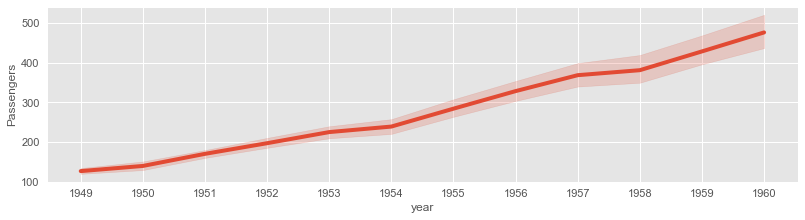

In [56]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=data)
plt.show()

<AxesSubplot:>

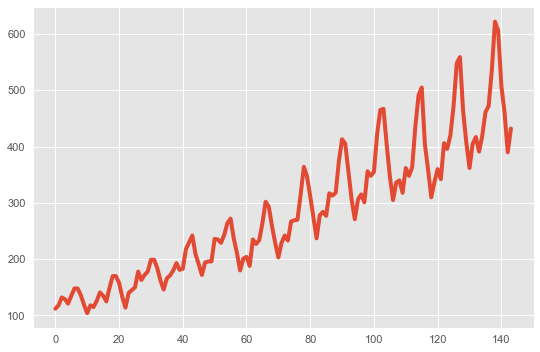

In [57]:
# Checking the trends and the season in the data

data['Passengers'].plot()

In [58]:
# Splitting Data into train and test

train = data.head(132)
test  = data.tail(12)

In [59]:
train.head()

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,1949-01,112,1949-01-01,Jan,1949,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1949-02,118,1949-02-01,Feb,1949,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1949-03,132,1949-03-01,Mar,1949,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1949-04,129,1949-04-01,Apr,1949,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1949-05,121,1949-05-01,May,1949,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


In [60]:
test.head()

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
132,1960-01,417,1960-01-01,Jan,1960,0,0,0,0,1,0,0,0,0,0,0,0,133,17689,6.033086
133,1960-02,391,1960-02-01,Feb,1960,0,0,0,1,0,0,0,0,0,0,0,0,134,17956,5.968708
134,1960-03,419,1960-03-01,Mar,1960,0,0,0,0,0,0,0,1,0,0,0,0,135,18225,6.037871
135,1960-04,461,1960-04-01,Apr,1960,1,0,0,0,0,0,0,0,0,0,0,0,136,18496,6.133398
136,1960-05,472,1960-05-01,May,1960,0,0,0,0,0,0,0,0,1,0,0,0,137,18769,6.156979


In [61]:
# Creating multiple method to choose the better predicting model among them
import statsmodels.formula.api as smf


linear_model = smf.ols('Passengers~t', data = train).fit()
pred_linear  =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear  = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
print("Root Mean Square Error : ",rmse_linear)

Root Mean Square Error :  78.82273053909205


In [62]:
Exp = smf.ols('log_Passengers~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
print("Root Mean Square Error : ",rmse_Exp)

Root Mean Square Error :  79.36672652506829


In [63]:
Quad = smf.ols('Passengers~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_Quad))**2))
print("Root Mean Square Error : ",rmse_Quad)

Root Mean Square Error :  73.28095252343827


In [64]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
print("Root Mean Square Error : ",rmse_add_sea)

Root Mean Square Error :  217.43312989965762


In [65]:
add_sea_quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
print("Root Mean Square Error : ",rmse_add_sea_quad)

Root Mean Square Error :  39.94692565674003


In [66]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
print("Root Mean Square Error : ",rmse_Mult_sea)

Root Mean Square Error :  237.0126427172432


In [67]:
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("Root Mean Square Error : ",rmse_Mult_add_sea) 

Root Mean Square Error :  40.1501364742982


In [68]:
Final_data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
Final_result = pd.DataFrame(Final_data)
Final_result.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,39.946926
6,rmse_Mult_add_sea,40.150136
2,rmse_Quad,73.280953
0,rmse_linear,78.822731
1,rmse_Exp,79.366727
3,rmse_add_sea,217.433130
5,rmse_Mult_sea,237.012643


In [69]:
Final_pred = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=data).fit()

In [70]:
pred_new  = pd.Series(Final_pred.predict(data))
pred_new

0       90.190479
1       82.498432
2      116.723051
3      112.697670
4      116.505623
          ...    
139    546.919084
140    499.194465
141    464.303179
142    431.495226
143    461.437274
Length: 144, dtype: float64